# Perkenalan

## Our Members:
1. Aulia Firdatunnisa
2. Mubdi Marfiki Ikhsan
3. Wilda Amrul Munafiah
4. Shintia Zhou

## Data
Dataset yang digunakan adalah Uber vs Lyft Dataset New  York. Dataset ini berisi record perjalanan taksi online Uber dan Lyft di New York, USA. Terdapat 57 atribut yang termuat dalam dataset ini. Dataset ini didapat dari sumber : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/code

## Objective
Objective yang ingin dicapat pada analisis ini, yaitu:
1. Mampu memahami konsep regression dengan Linear Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi



## Import Libraries

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
import plotly.express as px

## Data Loading

In [2]:
# Load a CSV file containing rideshare data
df = pd.read_csv('./data/rideshare_kaggle1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Exploratory data analysis

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# menampilkan data secara maksimal 

pd.set_option('display.max_columns',None)
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


**Check for missing value**

In [5]:
# Calculate the count of missing values in each column of the DataFrame
missing_count = df.isna().sum()

# Display the count of missing values for each column
missing_count

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**correlation**

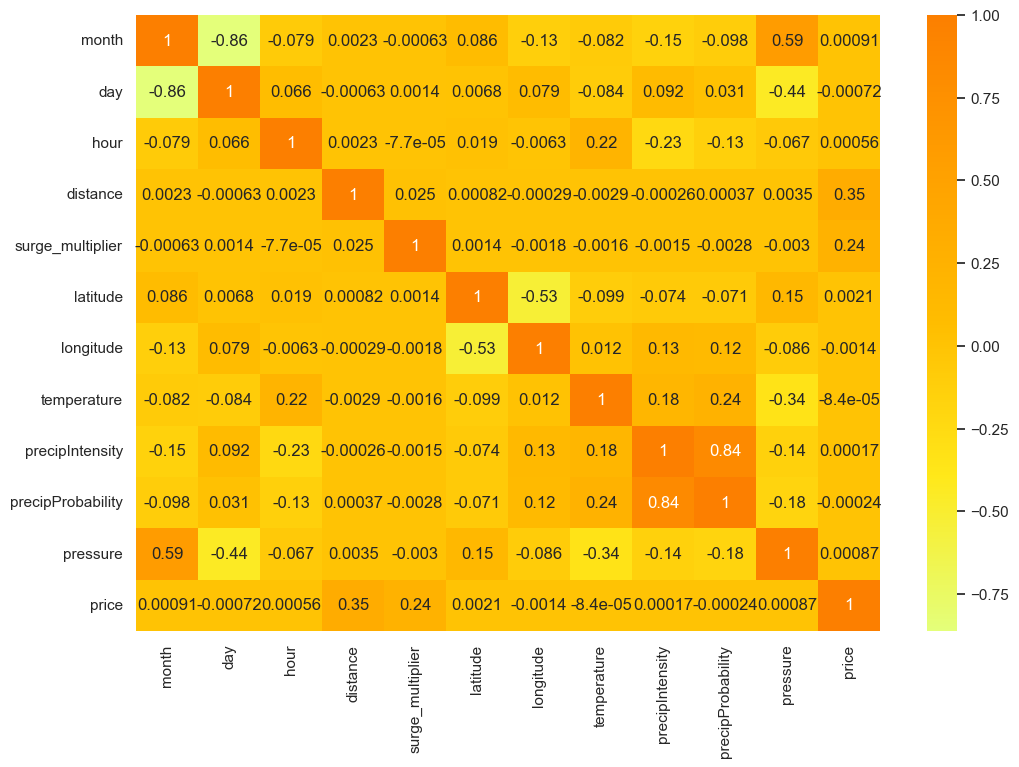

In [6]:
# correlation plot
analysis_cols = ["month", "day", "hour", "distance", "surge_multiplier",
        "latitude", "longitude", "temperature", "precipIntensity", "precipProbability", "pressure", "price"]
corr = df[analysis_cols].corr()

# Set the figure size for the correlation plot
plt.figure(figsize=(12, 8))  # You can adjust the width and height as needed

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(corr, cmap='Wistia', annot=True);

# Display the plot
plt.show()


there's no correlation among variables

**scatter plot to visualize the different effect of surging**

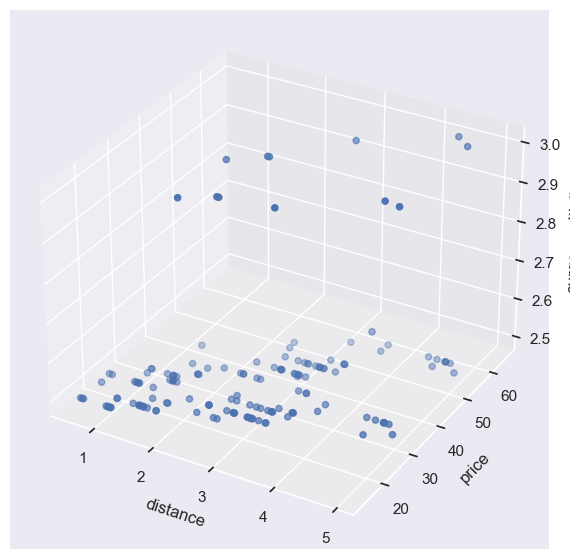

In [7]:
surge_data = df[df["surge_multiplier"]>2.0]
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111, projection = '3d')

x = surge_data['distance']
y = surge_data['price']
z = surge_data['surge_multiplier']

ax.set_xlabel("distance")
ax.set_ylabel("price")
ax.set_zlabel("surge_multiplier")

ax.scatter(x, y, z)

plt.show()

# Data Preprocessing

Remove missing price row and duplicates

In [8]:
# Remove rows with missing (NaN) values from the DataFrame
df = df.dropna()
# Remove duplicate rows from the DataFrame and modify it in-place
df.drop_duplicates(inplace=True)

Calculate central tendency and show other info

In [9]:
# Extract the 'price' column from the DataFrame and assign it to the variable 'price'
price = df['price']

# Calculate and print the mean (average) of the 'price' column
print("Mean : ", price.mean())

# Calculate and print the median of the 'price' column
print("Median : ", price.median())

# Calculate and print the mode (most frequent value) of the 'price' column
print("Mode : ", price.mode())

# Generate and display a summary of basic statistics for the 'price' column
price.describe()


Mean :  16.545125490614065
Median :  13.5
Mode :  0    7.0
Name: price, dtype: float64


count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

Grouping and query

In [10]:
# Group the DataFrame 'df' by the 'destination' column and calculate the sum of prices for each group
destination_prices = df.groupby('destination')['price'].sum()

In [11]:
destination_prices.head()

destination
Back Bay               862218.00
Beacon Hill            858562.00
Boston University     1007172.35
Fenway                 964772.50
Financial District     977964.00
Name: price, dtype: float64

Plot based on destination and price grouping 

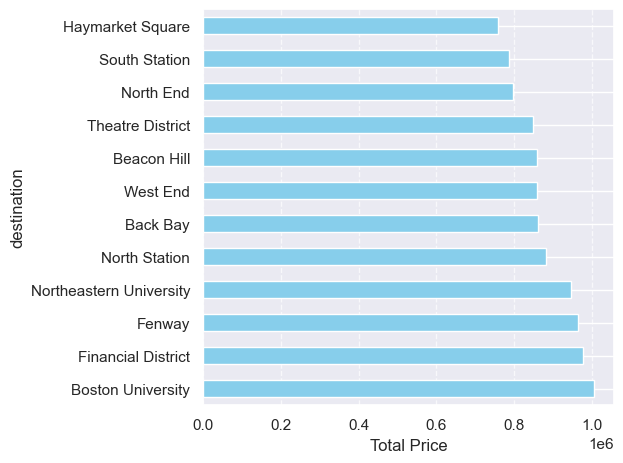

In [12]:
# Sort the 'destination_prices' data in descending order, based on the total prices
destination_prices = destination_prices.sort_values(ascending=False)

# Create a new figure for plotting
plt.figure()

# Plot the destination prices as a horizontal bar chart
destination_prices.plot(kind='barh', color='skyblue')

# Add grid lines for the x-axis with a dashed line style and transparency
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Label for the y-axis (vertical axis)
plt.xlabel('Total Price')

# Ensure the plot layout is tight
plt.tight_layout()

# Display the plot
plt.show()


Filter necessary columns 

In [13]:
# Select and retain specific columns as features in the DataFrame
features_cols = ["month","day","hour","distance","surge_multiplier","cab_type",
            "latitude","longitude","temperature","precipIntensity","precipProbability",
            "humidity","windSpeed","windGust","dewPoint","pressure","ozone","price"]
df = df[features_cols]

Remove outliers

In [14]:
# Calculate the quartile (Q1) (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# identifying outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_lower = df['price'] > lower_limit
outliers_upper = df['price'] < upper_limit

# Filter the DataFrame to remove outliers based on the lower and upper limits
df = df[outliers_lower & outliers_upper]


Plot Hourly cab type count comparison

In [15]:
# Group the DataFrame 'df' by 'hour' and 'cab_type', and count the occurrences, then reset the index
hour_df = df.groupby(by=["hour", "cab_type"]).size().reset_index(name="counts")

# Create a bar plot using Plotly Express
px.bar(data_frame=hour_df, x="hour", y="counts", color="cab_type", barmode="group")

Plotting linear regression with 500 head data

c:\Users\LENOVO YOGA 6\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



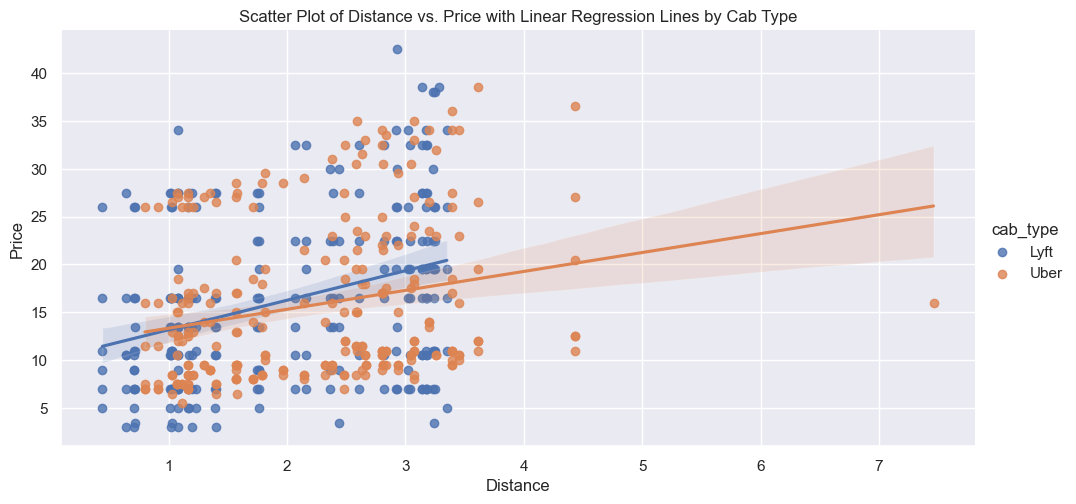

In [16]:
# Create a scatter plot with linear regression lines using Seaborn (sns.lmplot)
sns.lmplot(data=df.head(500), x='distance', y='price', hue='cab_type', aspect=2)

plt.title('Scatter Plot of Distance vs. Price with Linear Regression Lines by Cab Type')
plt.xlabel('Distance')
plt.ylabel('Price')

plt.show()


Preparing test train split

In [17]:
# Extract the dependent variable 'price' and assign it to 'y'
y = df['price']

# Extract the independent variables and assign them to 'x'
x = df[["distance", "surge_multiplier", "distance"]]


In [18]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelling

Model Building

In [19]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
LR = LinearRegression().fit(x_train, y_train)


In [20]:
# Use the trained LinearRegression model (LR) to make predictions on the testing data (x_test)
y_prediction = LR.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Predicting the R-squared (R2) score to evaluate the model's goodness of fit
score = r2_score(y_test, y_prediction)
print('r2 score is', score)

# Calculating and printing the mean squared error (MSE)
mse = mean_squared_error(y_test, y_prediction)
print('mean_squared_error is', mse)

# Calculating and printing the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('root_mean_squared_error is', rmse)


r2 score is 0.12010407293594494
mean_squared_error is 67.64701854902061
root_mean_squared_error is 8.224780759936438


In [22]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant (intercept) to the independent variables
X2 = sm.add_constant(x)

# Create an Ordinary Least Squares (OLS) model with the dependent variable 'y' and the augmented independent variables
est = sm.OLS(y, X2)

# Fit the OLS model to the data and obtain the results
est2 = est.fit()

# Print a summary of the regression results, including statistics such as coefficients, R-squared, and p-values
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                 2.897e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:47:10   Log-Likelihood:            -2.2297e+06
No. Observations:              632387   AIC:                         4.459e+06
Df Residuals:                  632383   BIC:                         4.459e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9962      0.129  

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

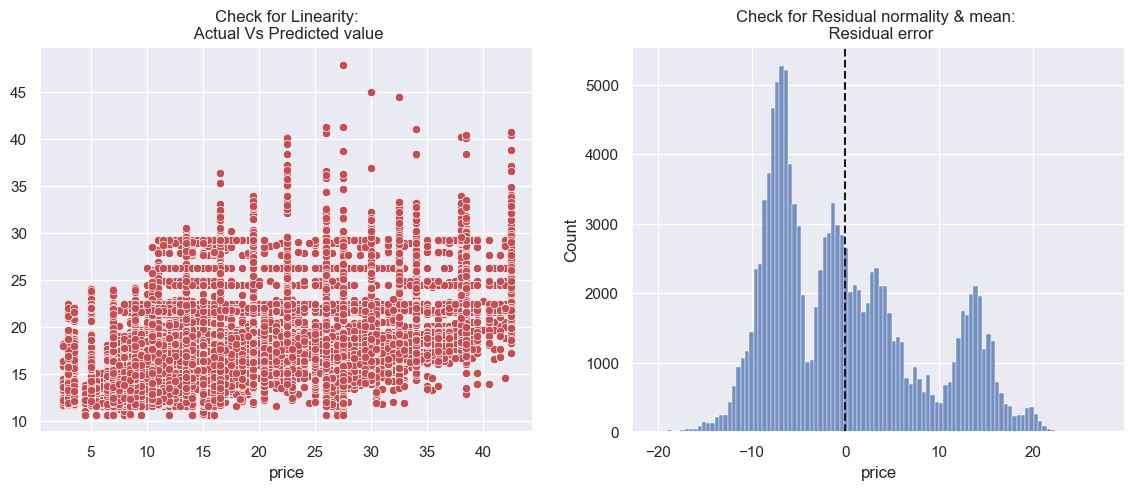

In [23]:
# Check for Linearity
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_prediction, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_prediction), ax=ax, color='b')
ax.axvline((y_test - y_prediction).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')


# Analysis

In [24]:
# Dapat di simpulkan bahwa layanan ride-hailing di Boston sangat dipengaruhi oleh waktu dan lokasi. Permintaan tertinggi terjadi pada hari kerja pada sore hari,
# sedangkan permintaan terendah terjadi pada hari libur pada pagi hari. Selain itu, permintaan layanan ride-hailing lebih tinggi di kawasan pusat kota Boston 
# daripada di kawasan pinggiran kota. Hal ini menunjukkan bahwa layanan ride-hailing lebih banyak digunakan untuk perjalanan ke dan dari kawasan pusat kota.

# Uber memiliki pangsa pasar yang lebih besar daripada Lyft di Boston, dengan jumlah permintaan Uber yang lebih tinggi daripada Lyft pada sebagian besar waktu 
# dan hari. Waktu tunggu rata-rata untuk mendapatkan taksi Uber lebih rendah daripada waktu tunggu rata-rata untuk mendapatkan taksi Lyft. Hal ini menunjukkan 
# bahwa Uber memiliki armada yang lebih besar atau bahwa Uber lebih efisien dalam memproses permintaan perjalanan.

# Harga rata-rata untuk perjalanan Uber lebih tinggi daripada harga rata-rata untuk perjalanan Lyft. Hal ini menunjukkan bahwa Uber memposisikan dirinya sebagai 
# layanan ride-hailing premium. Namun, jarak rata-rata perjalanan Uber dan Lyft relatif sama, sehingga kedua layanan ride-hailing digunakan untuk perjalanan 
# jarak pendek dan menengah.

# Kesimpulan-konklusi ini dapat membantu Lyft dan Uber dalam meningkatkan strategi pemasaran, penentuan harga, dan manajemen permintaan, serta untuk mengoptimalkan 
# pengalaman pengguna. Namun, perlu diperhatikan bahwa model regresi mungkin perlu ditingkatkan untuk mengatasi penyimpangan dari distribusi normal dalam kesalahan 
# residual.